In [32]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [33]:
import clustering

In [34]:
random_seed = 10

In [35]:
data=pd.read_csv('dataset/Country-data.csv')

missing_value=data.isnull().sum()
percent_missing = data.isnull().sum()/data.shape[0]*100

value = {
    'missing_value': missing_value,
    'percent_missing': percent_missing
}

frame = pd.DataFrame(value)
frame

,missing_value,percent_missing
country,0,0.0
child_mort,0,0.0
exports,0,0.0
health,0,0.0
imports,0,0.0
income,0,0.0
inflation,0,0.0
life_expec,0,0.0
total_fer,0,0.0
gdpp,0,0.0


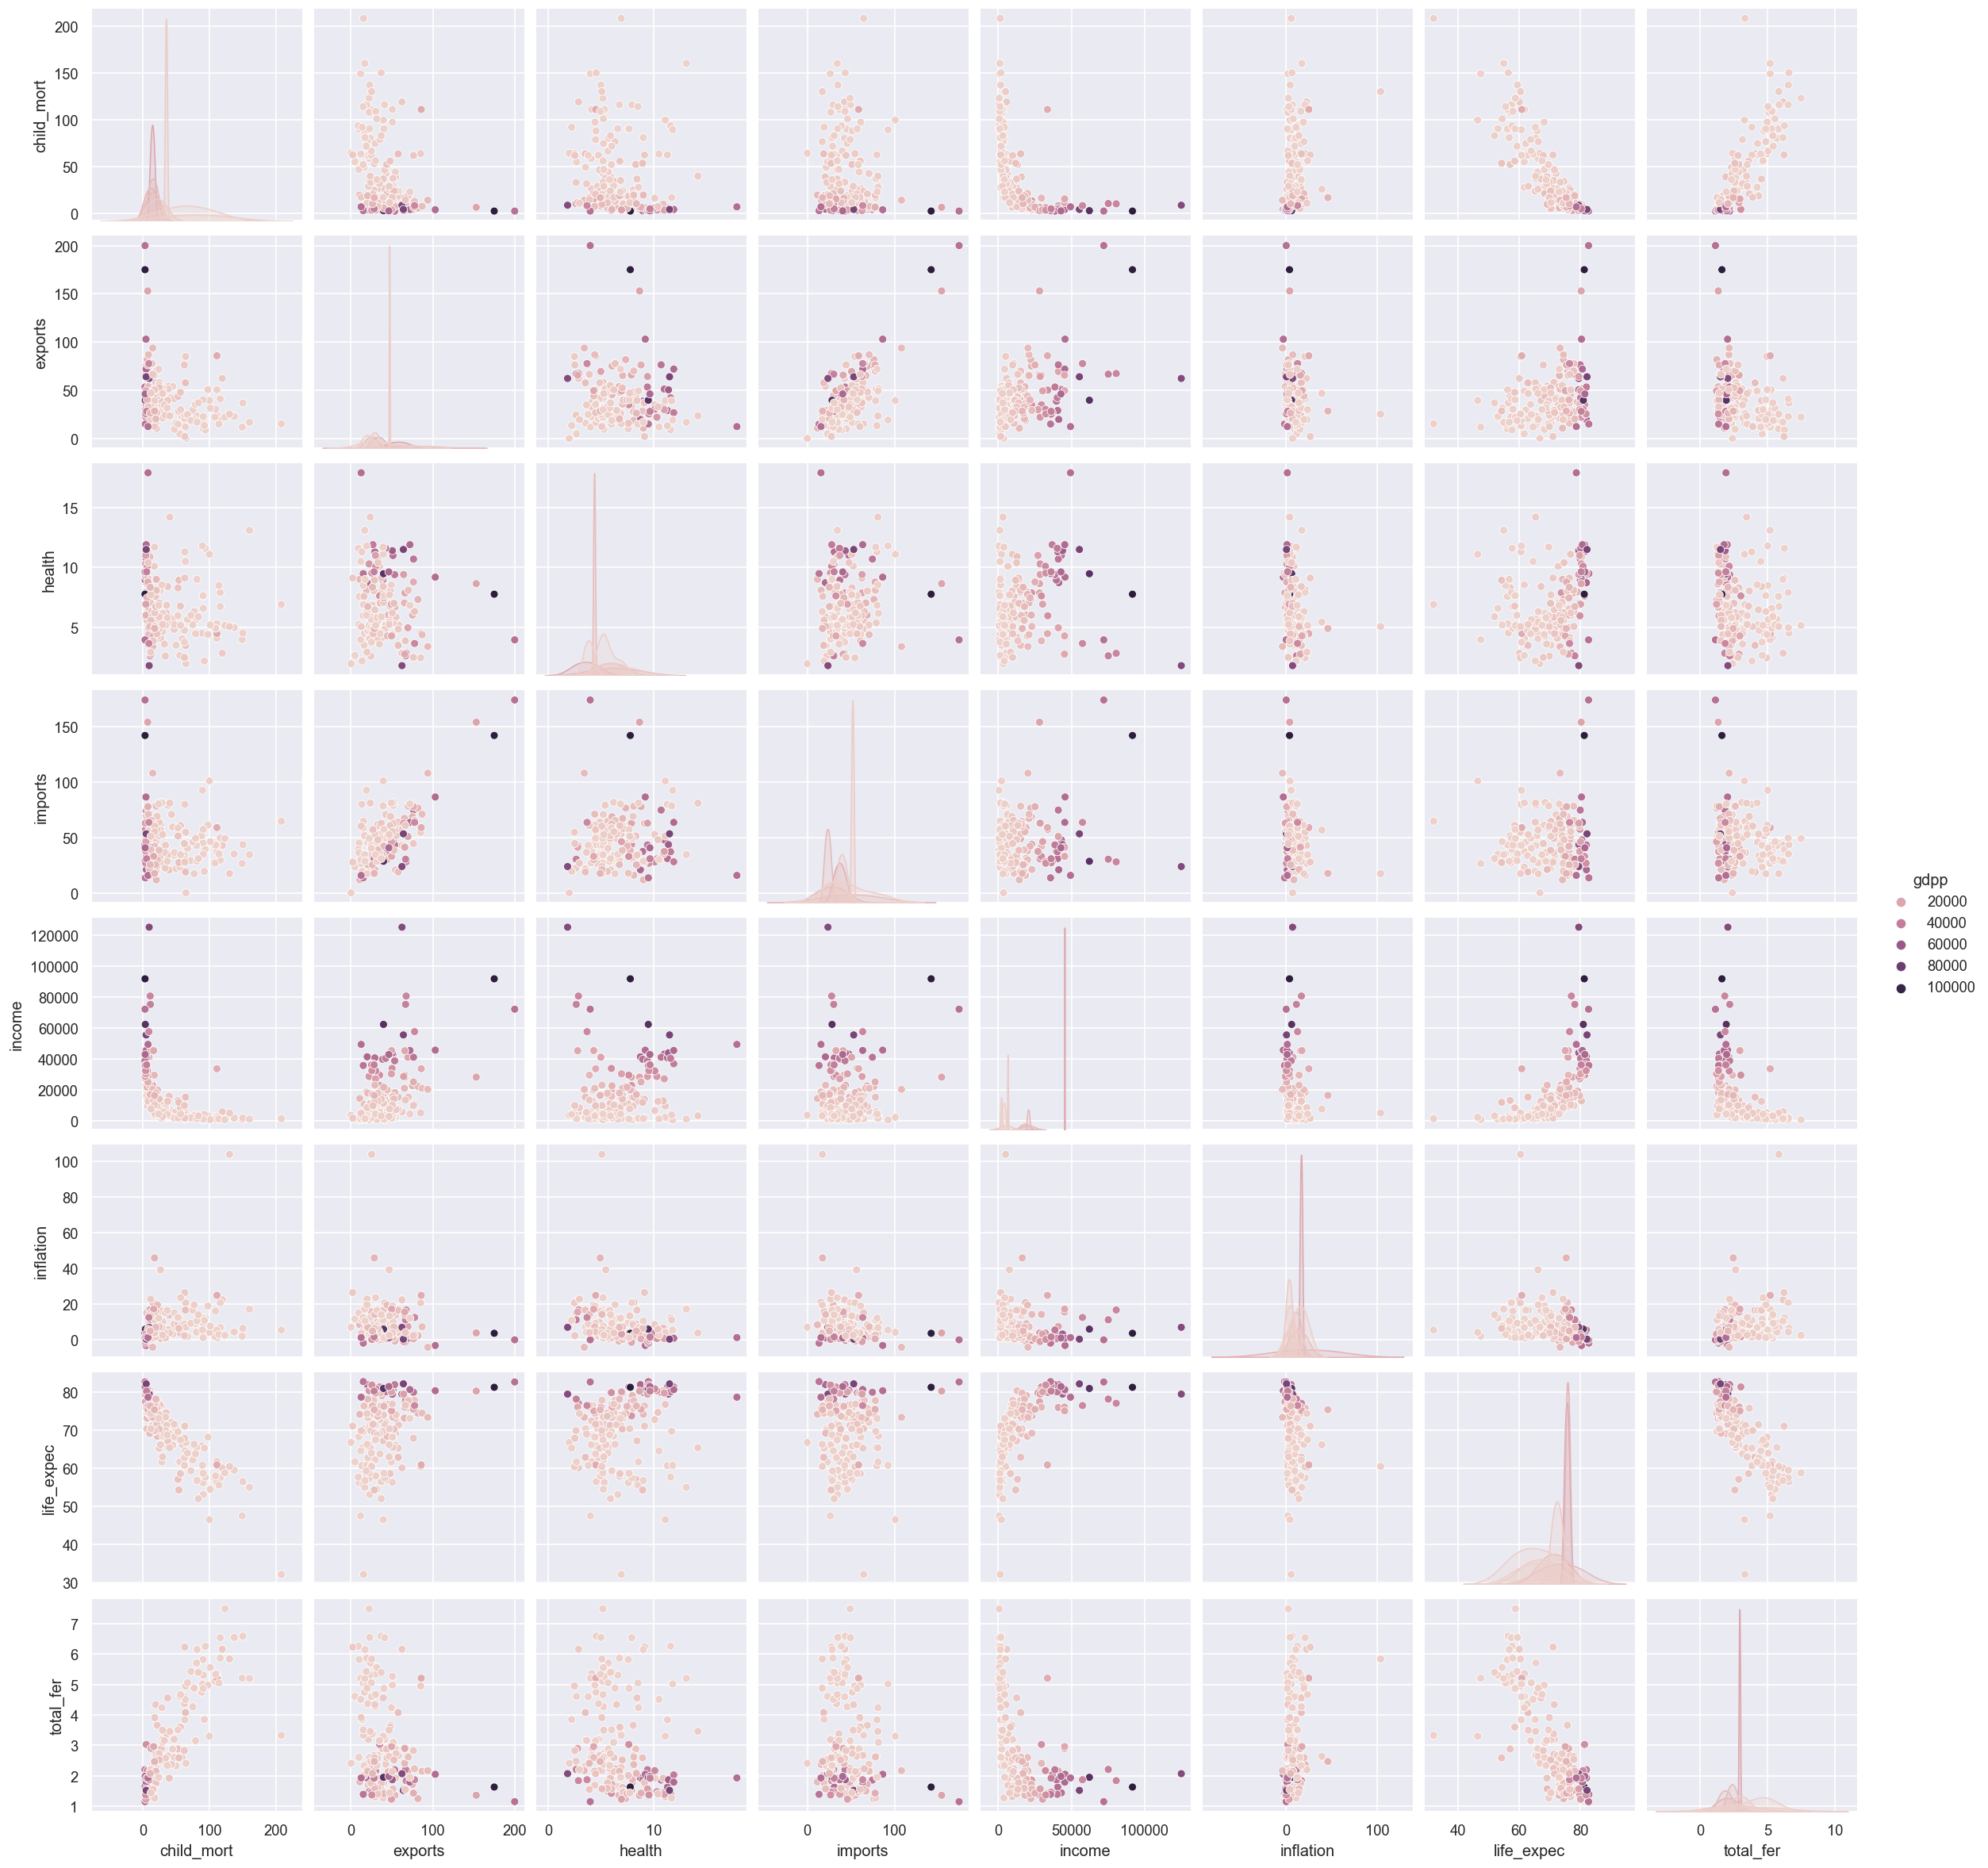

In [36]:
sns.set(style="darkgrid")
hue_column = 'gdpp'
sns.pairplot(data, hue=hue_column, vars=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer'])
plt.show()

In [37]:
data['net_balance'] = data['exports']-data['imports']

In [38]:
columns = data.columns.difference(['country'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[columns])
data[columns] = scaled_data

In [39]:
data_clustering = data.copy().drop(['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'total_fer', 'net_balance'], axis=1)

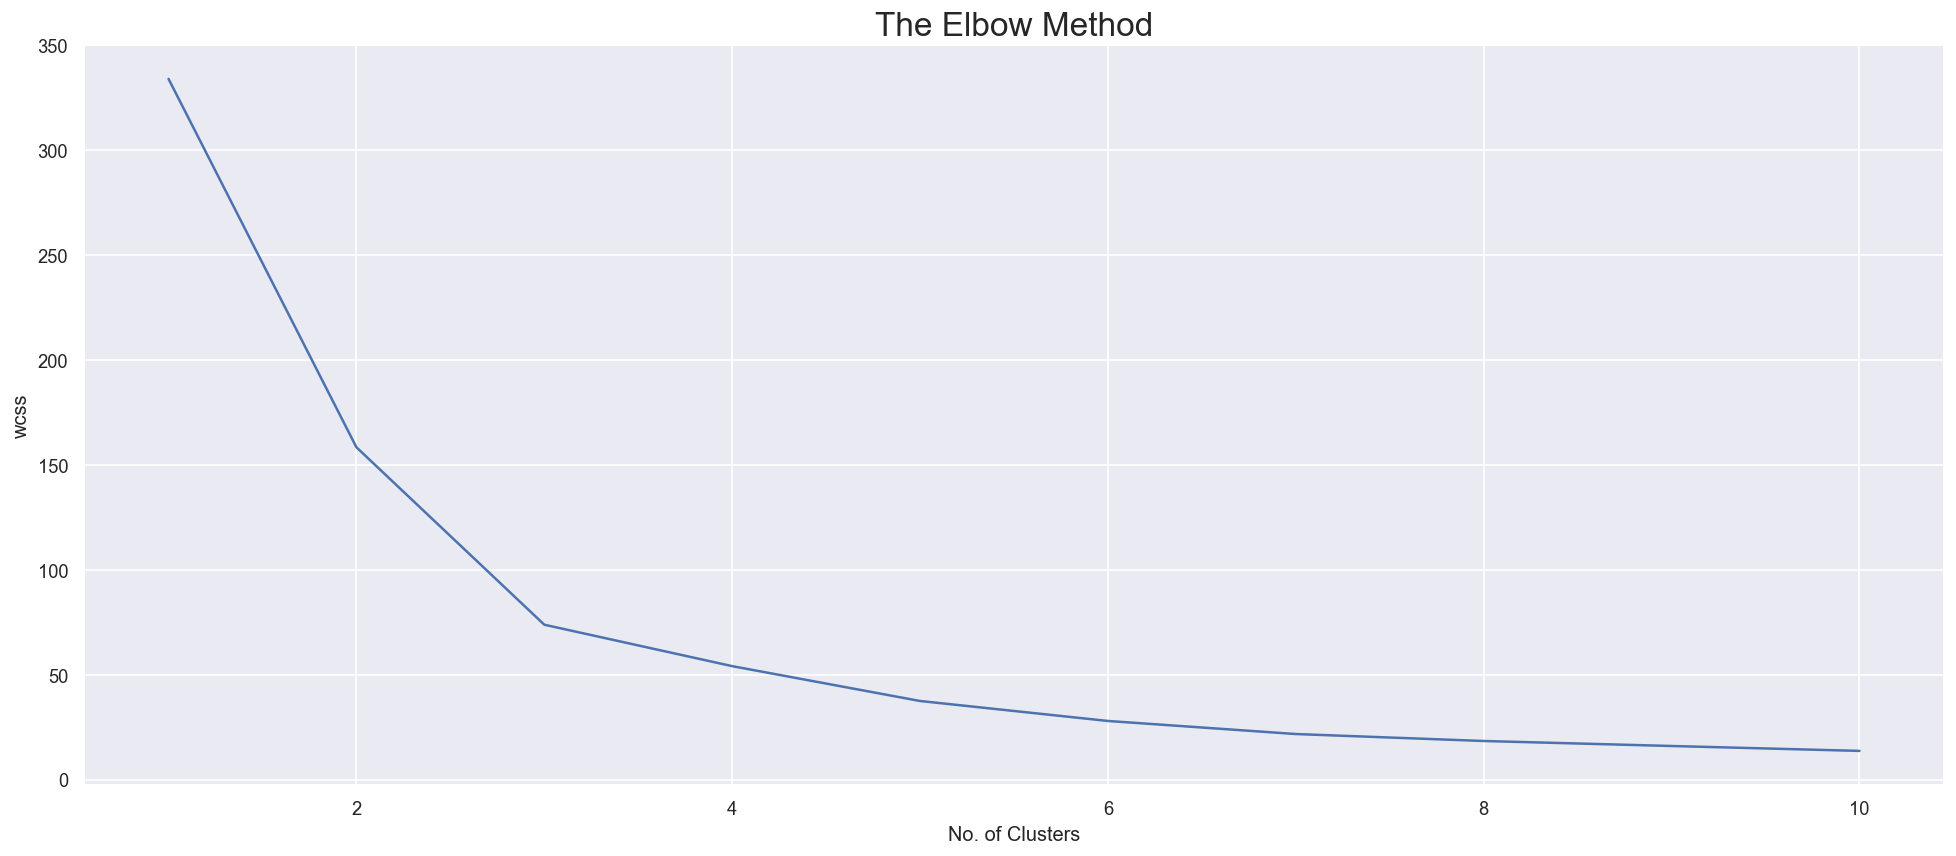

In [43]:
km = clustering.elbow_metod(KMeans, data_clustering, random_seed=random_seed)

In [44]:
labels = ['cluster a', 'cluster b', 'cluster c']
x = 'life_expec'
y = 'gdpp'
title = 'KMeans Clustering'
annotation = data[['country']].copy()
y_means = clustering.cluster_visualizator(KMeans, data_clustering, 3, labels, x, y, annotations=annotation, title=title, skip_rows=1, random_seed=random_seed)

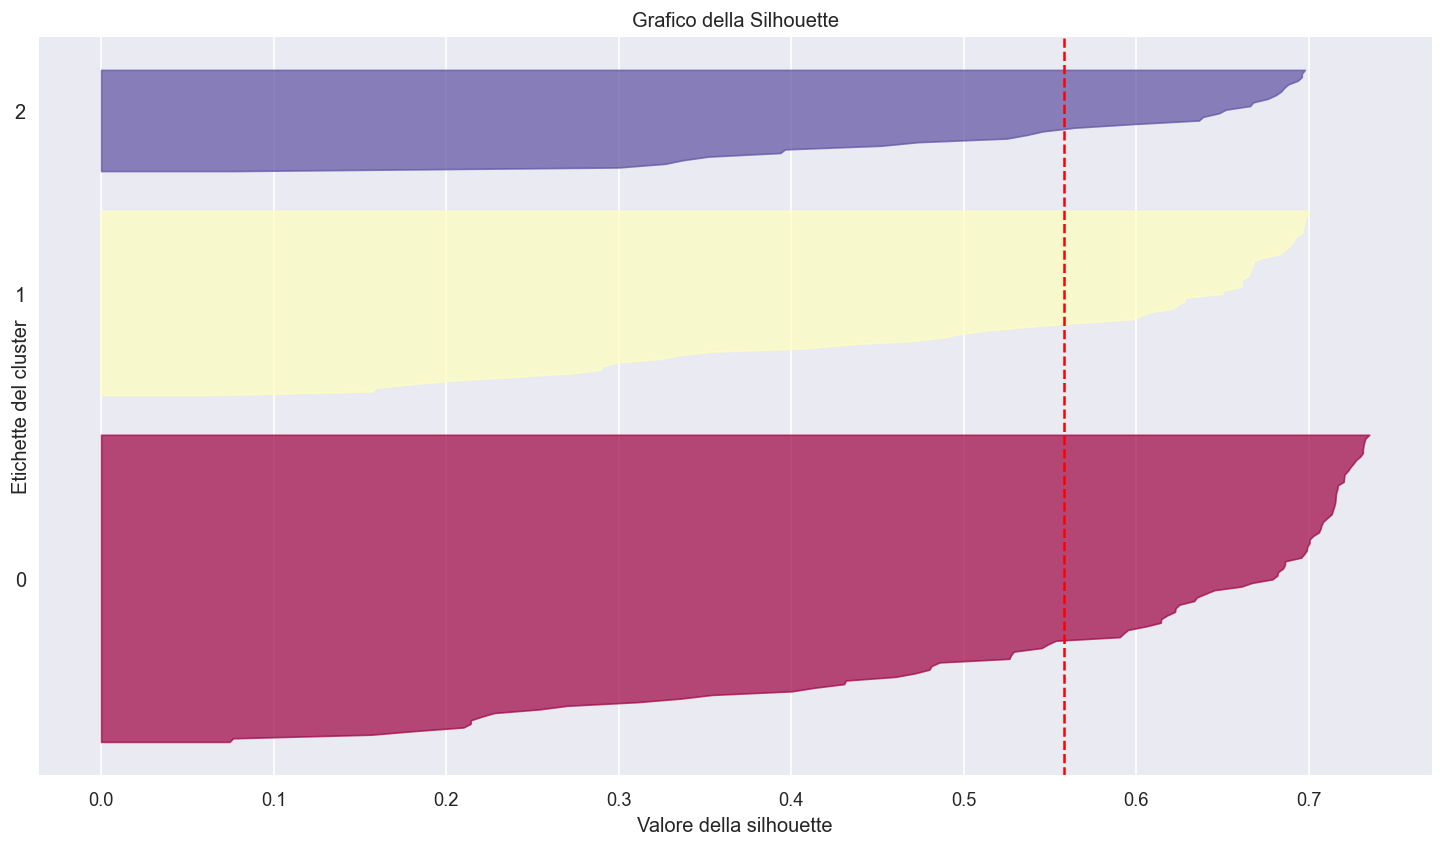

In [11]:
clustering.plot_silhouette(data_clustering, y_means)

In [50]:
labels = ['cluster a', 'cluster b', 'cluster c']
x = 'life_expec'
y = 'gdpp'
title = 'Hierarchical Clustering'
y_agg = clustering.hierarchical_cluster_visualizator(AgglomerativeClustering, data_clustering, 3, labels, x, y, annotations=annotation, skip_rows=3, title=title)

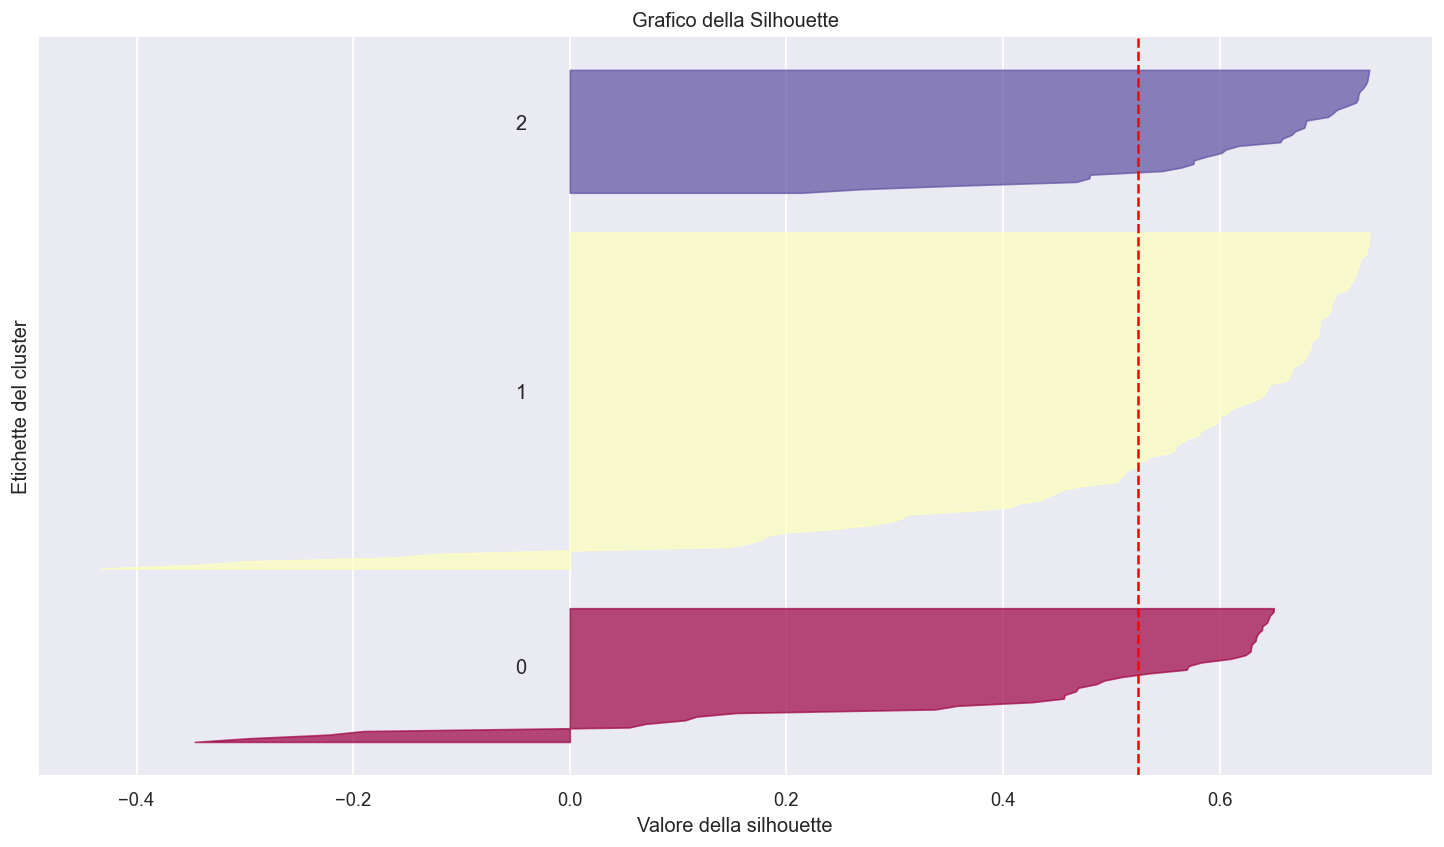

In [13]:
clustering.plot_silhouette(data_clustering, y_agg)

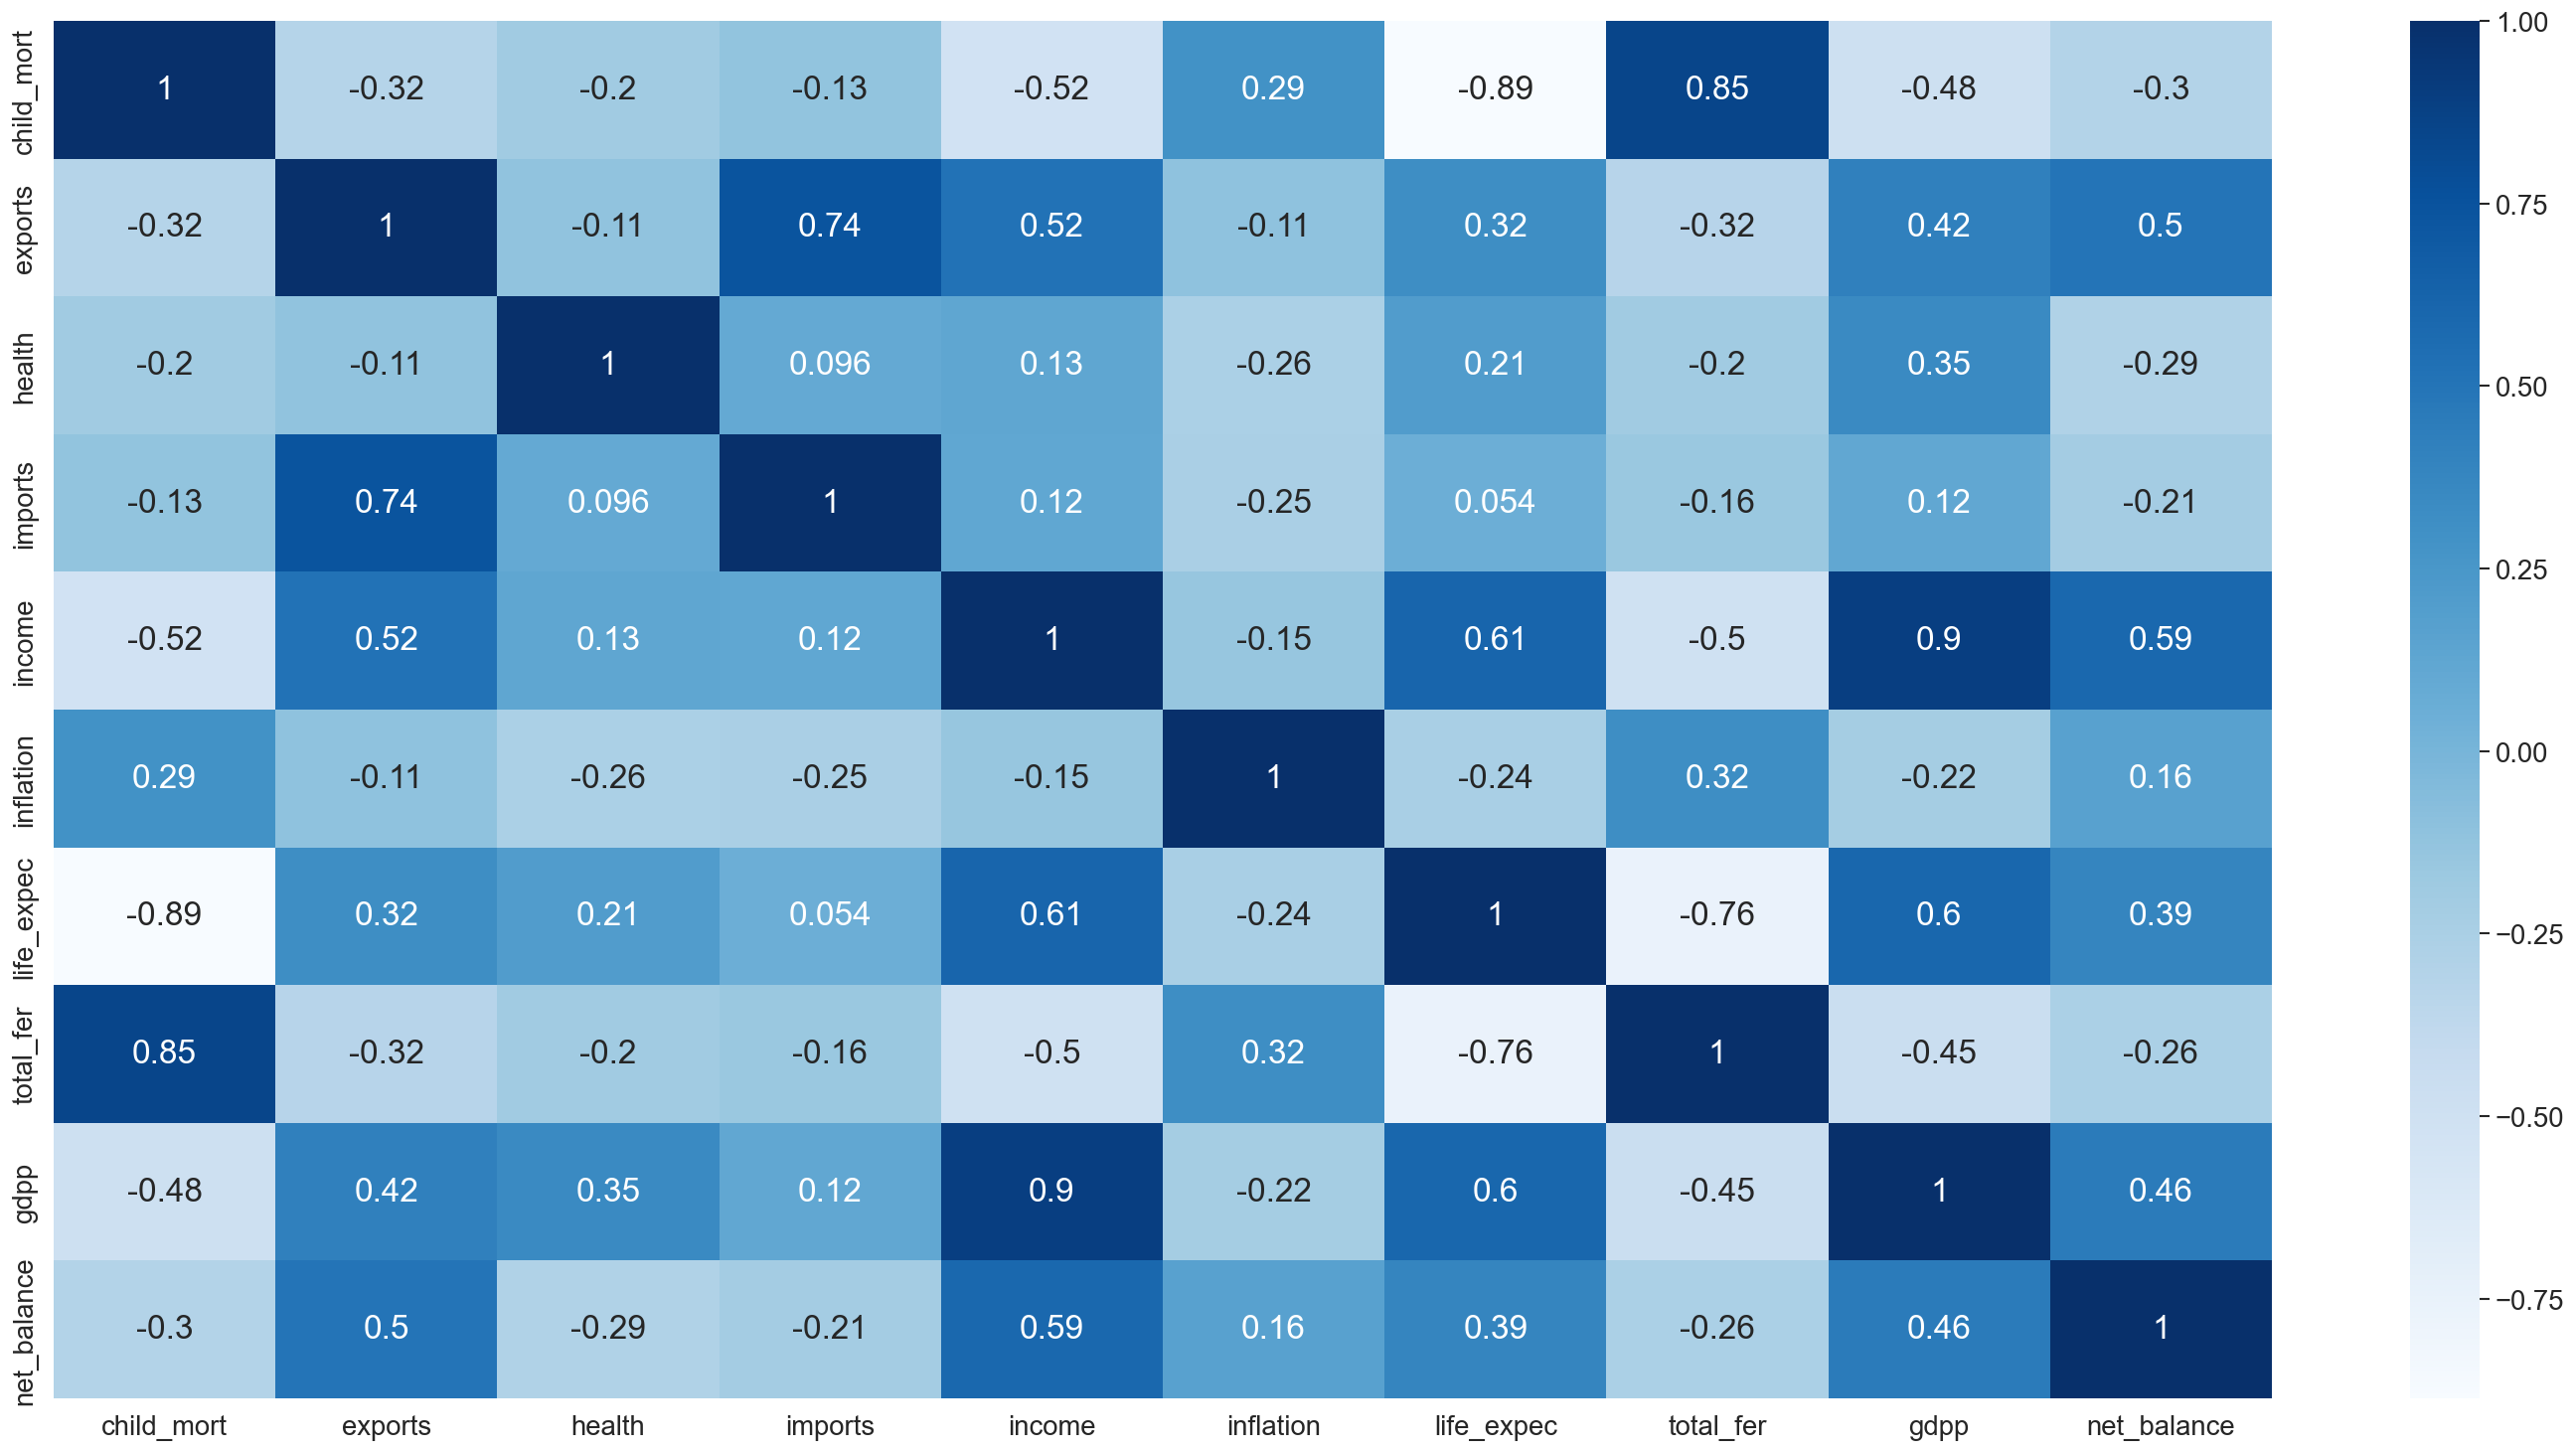

In [14]:
sns.set(style="darkgrid")
correlation = data.drop('country', axis=1).corr()
plt.figure(figsize=(30,15))
sns.set(font_scale=1.5)
sns.heatmap(correlation, cmap="Blues", annot=True, annot_kws={"size": 20})
plt.show()

In [51]:
data_pca = data[['gdpp', 'inflation', 'health', 'total_fer', 'net_balance', 'child_mort', 'life_expec']].copy()

Explained variance
[0.48931785 0.2096229  0.12235668 0.09887739 0.03657003 0.0312692
 0.01198594]


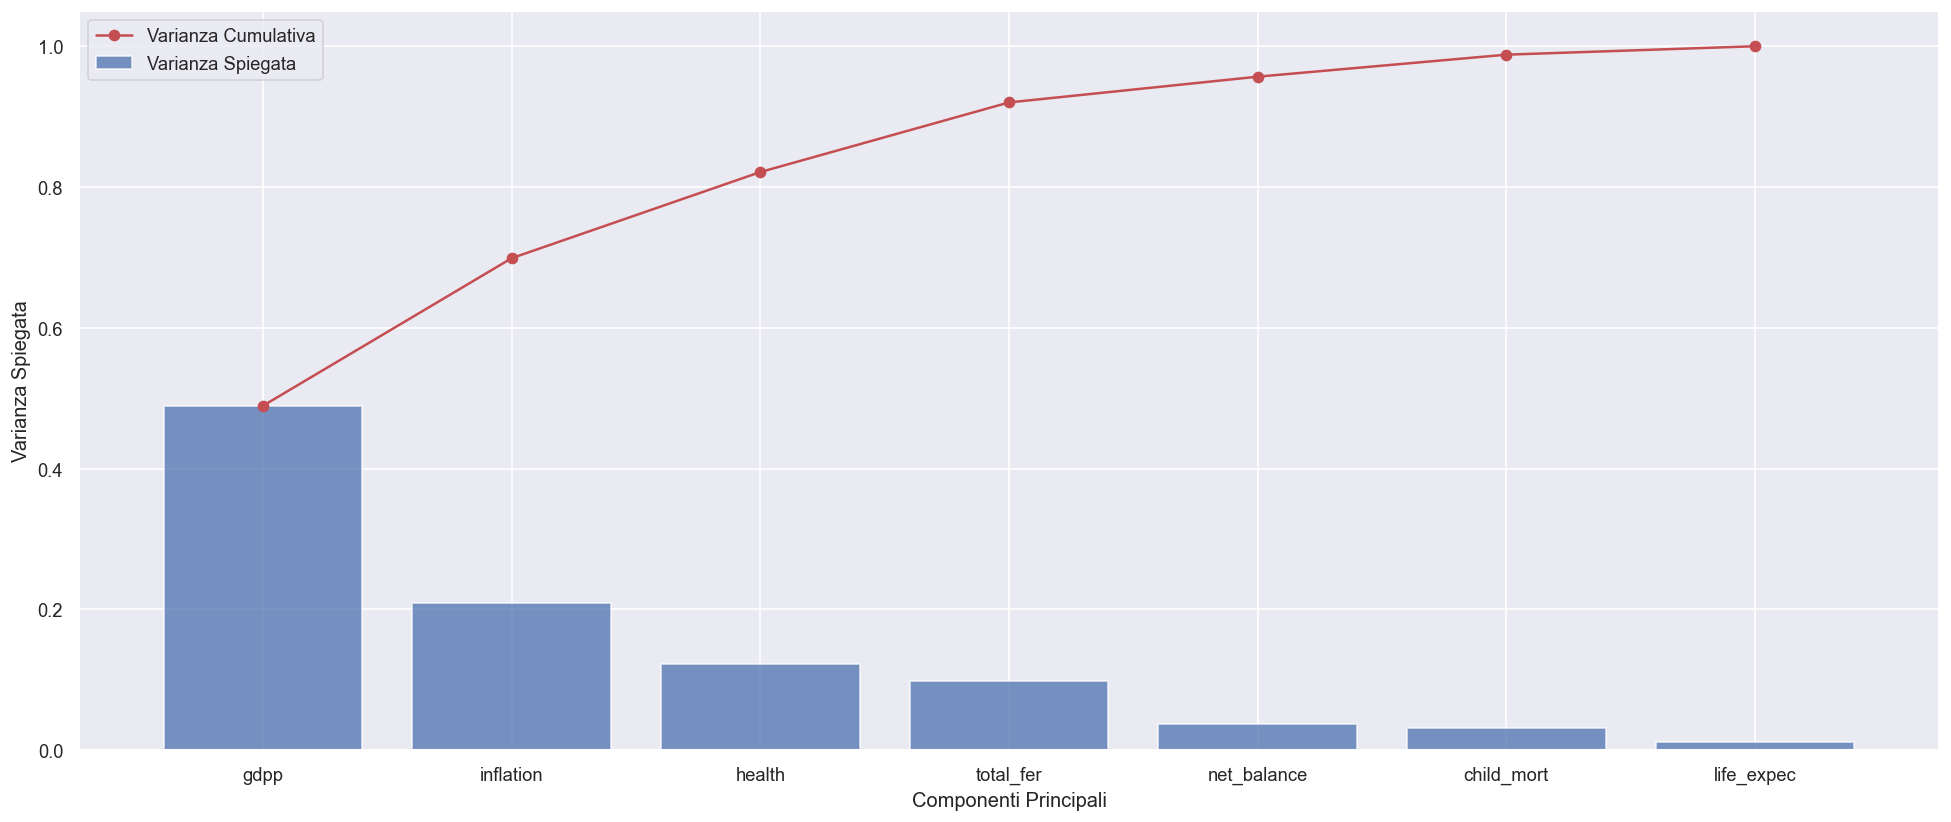

Carichi (Loadings):
       gdpp  inflation    health  total_fer  net_balance  child_mort  \
0 -0.397753   0.208809 -0.173549   0.470240    -0.231699    0.493899   
1  0.051991   0.484190 -0.589231   0.021643     0.639761   -0.013995   

   life_expec  
0   -0.499326  
1    0.075536  


In [52]:
clustering.pca_loadings(data_pca, 2)

In [61]:
data_pca, pca = clustering.pca_transform(data_pca, 2)

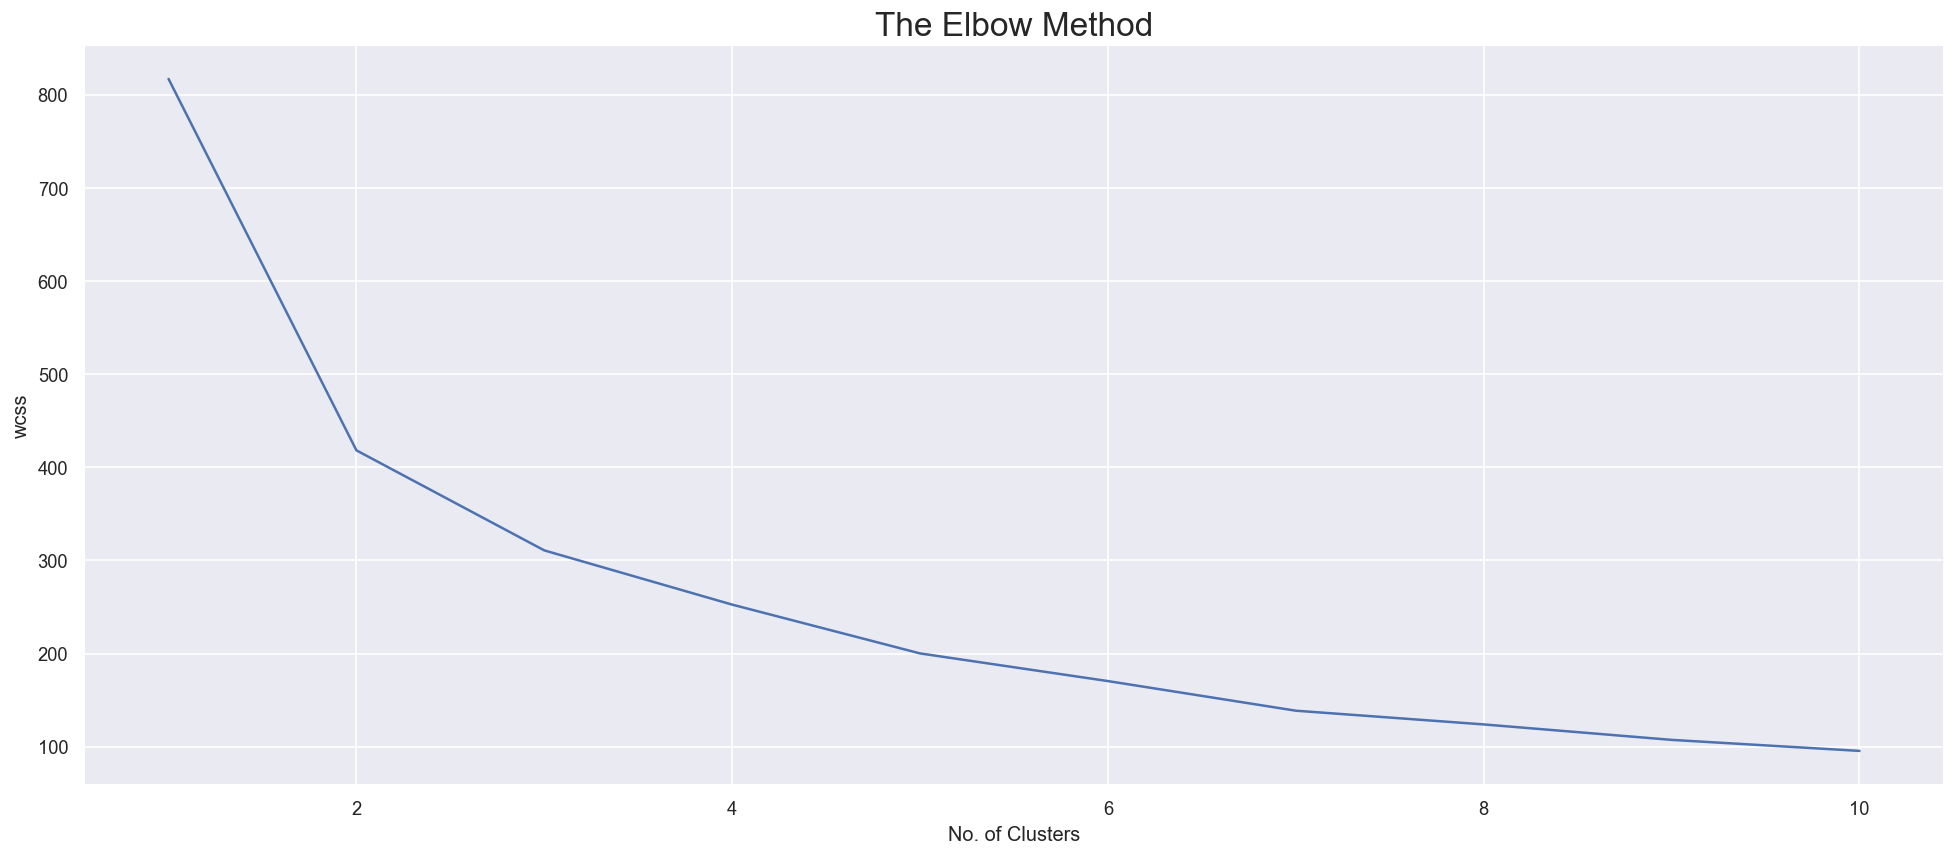

In [62]:
km = clustering.elbow_metod(KMeans, data_pca, random_seed=random_seed)

In [65]:
labels = ['cluster a', 'cluster b', 'cluster c']
x = 'tasso di fertilità'
y = 'bilancio netto positivo'
title = 'KMeans Clustering'
y_means = clustering.pca_cluster_visualizator(KMeans, data_pca, 3, labels, x, y, title=title, annotations=annotation, skip_rows=1, random_seed=random_seed)

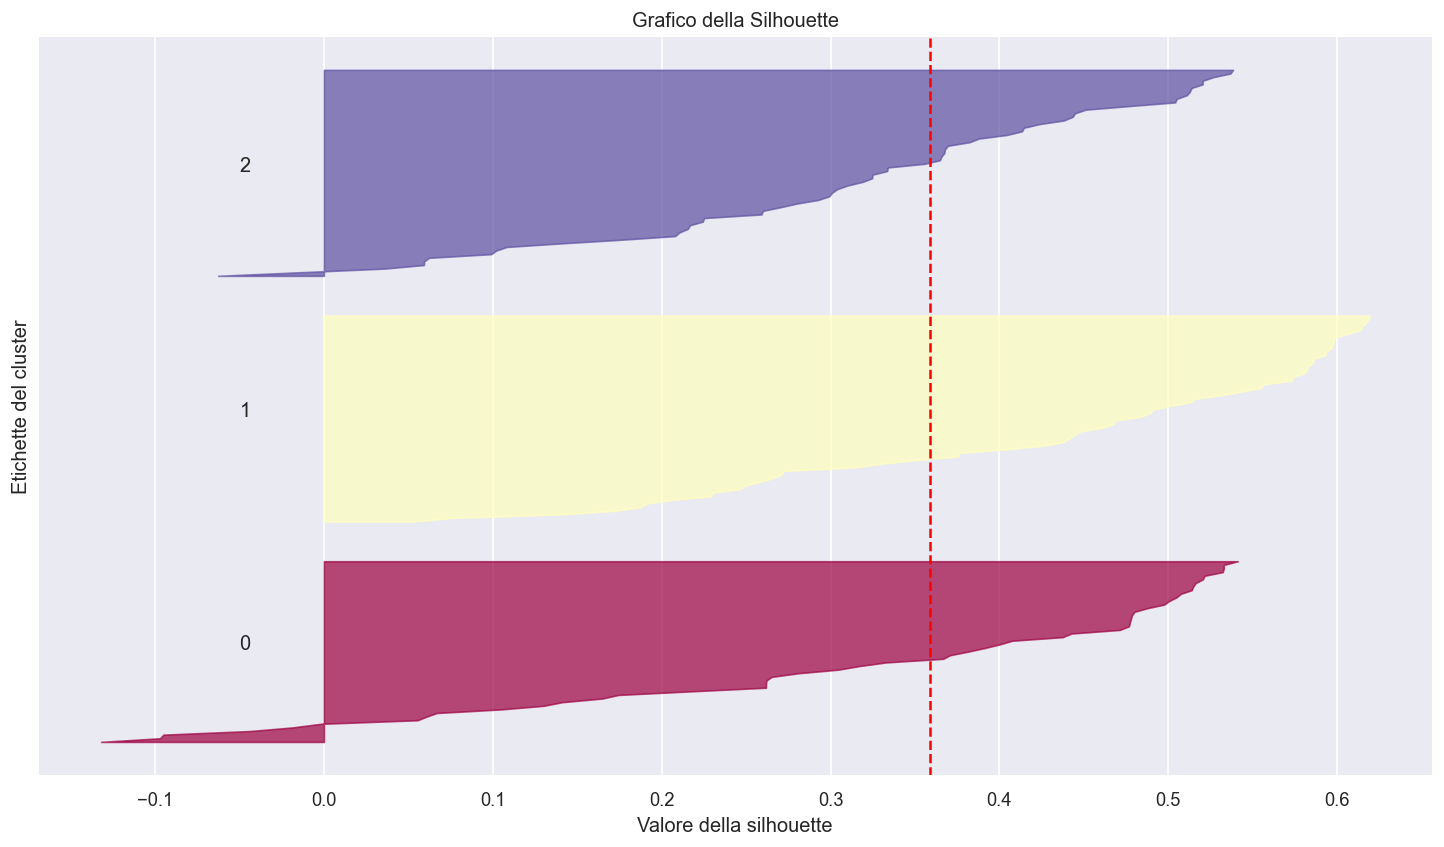

In [20]:
clustering.plot_silhouette(data_pca, y_means)

clustering tridimensionale

Explained variance
[0.48931785 0.2096229  0.12235668 0.09887739 0.03657003 0.0312692
 0.01198594]


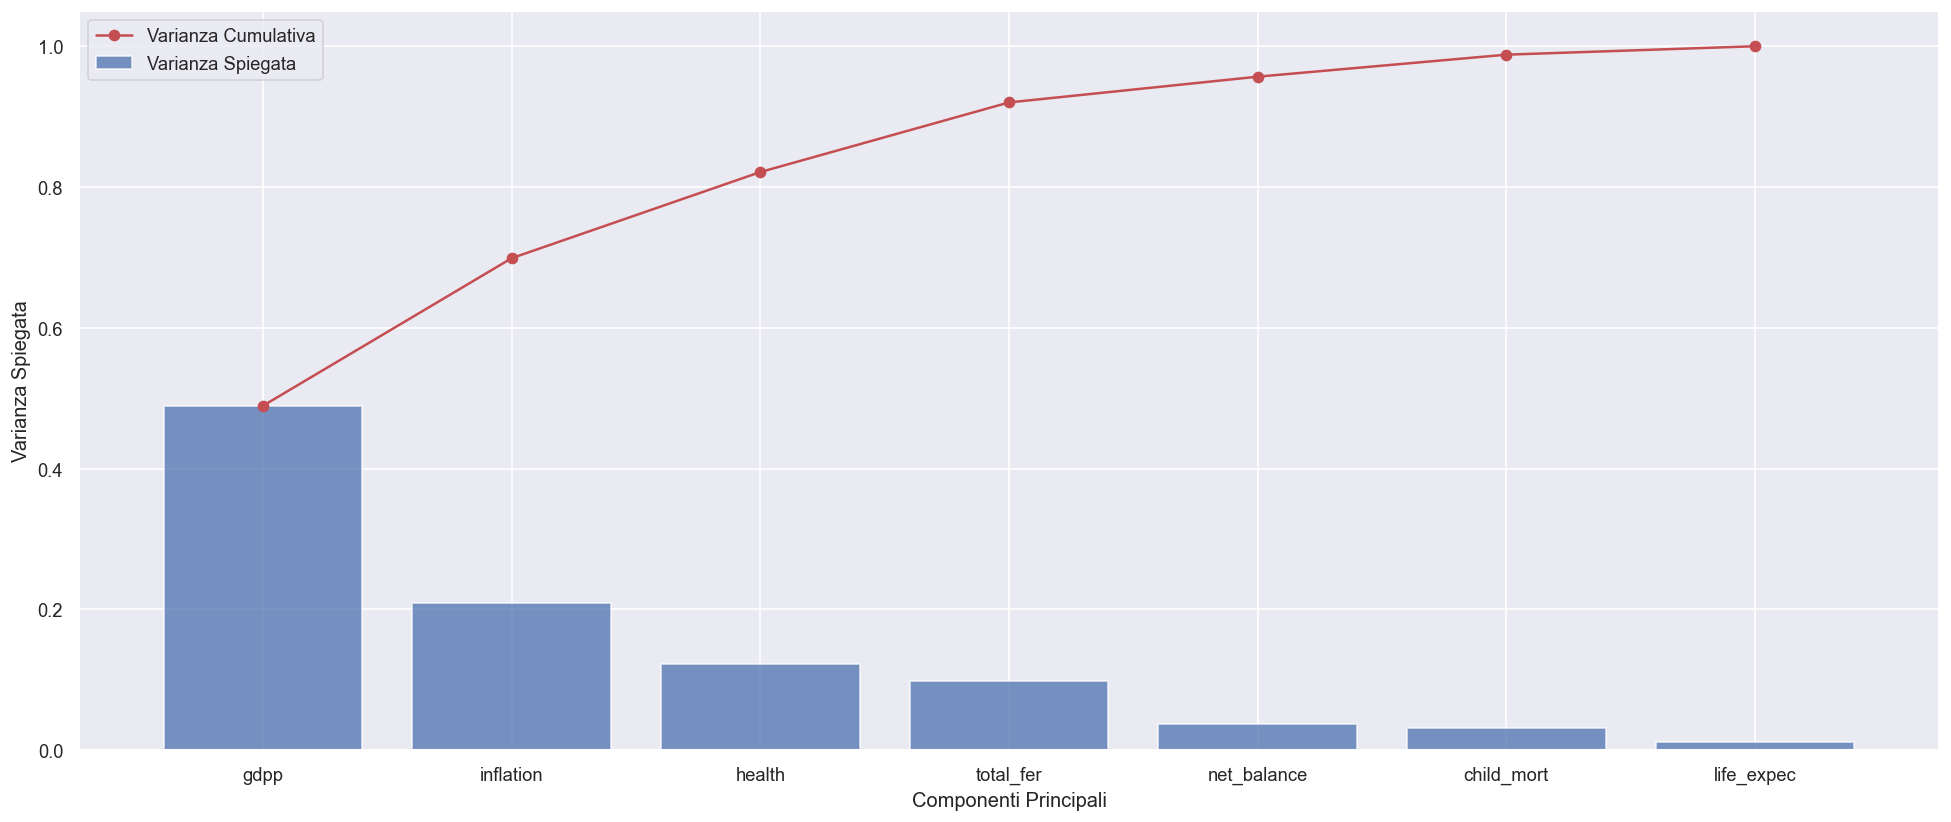

Carichi (Loadings):
       gdpp  inflation    health  total_fer  net_balance  child_mort  \
0 -0.397753   0.208809 -0.173549   0.470240    -0.231699    0.493899   
1  0.051991   0.484190 -0.589231   0.021643     0.639761   -0.013995   
2  0.574048   0.349612  0.577813   0.299353     0.225565    0.260755   

   life_expec  
0   -0.499326  
1    0.075536  
2   -0.076734  


In [54]:
data_pca = data[['gdpp', 'inflation', 'health', 'total_fer', 'net_balance', 'child_mort', 'life_expec']].copy()
clustering.pca_loadings(data_pca, 3)
data_pca, pca = clustering.pca_transform(data_pca, 3)

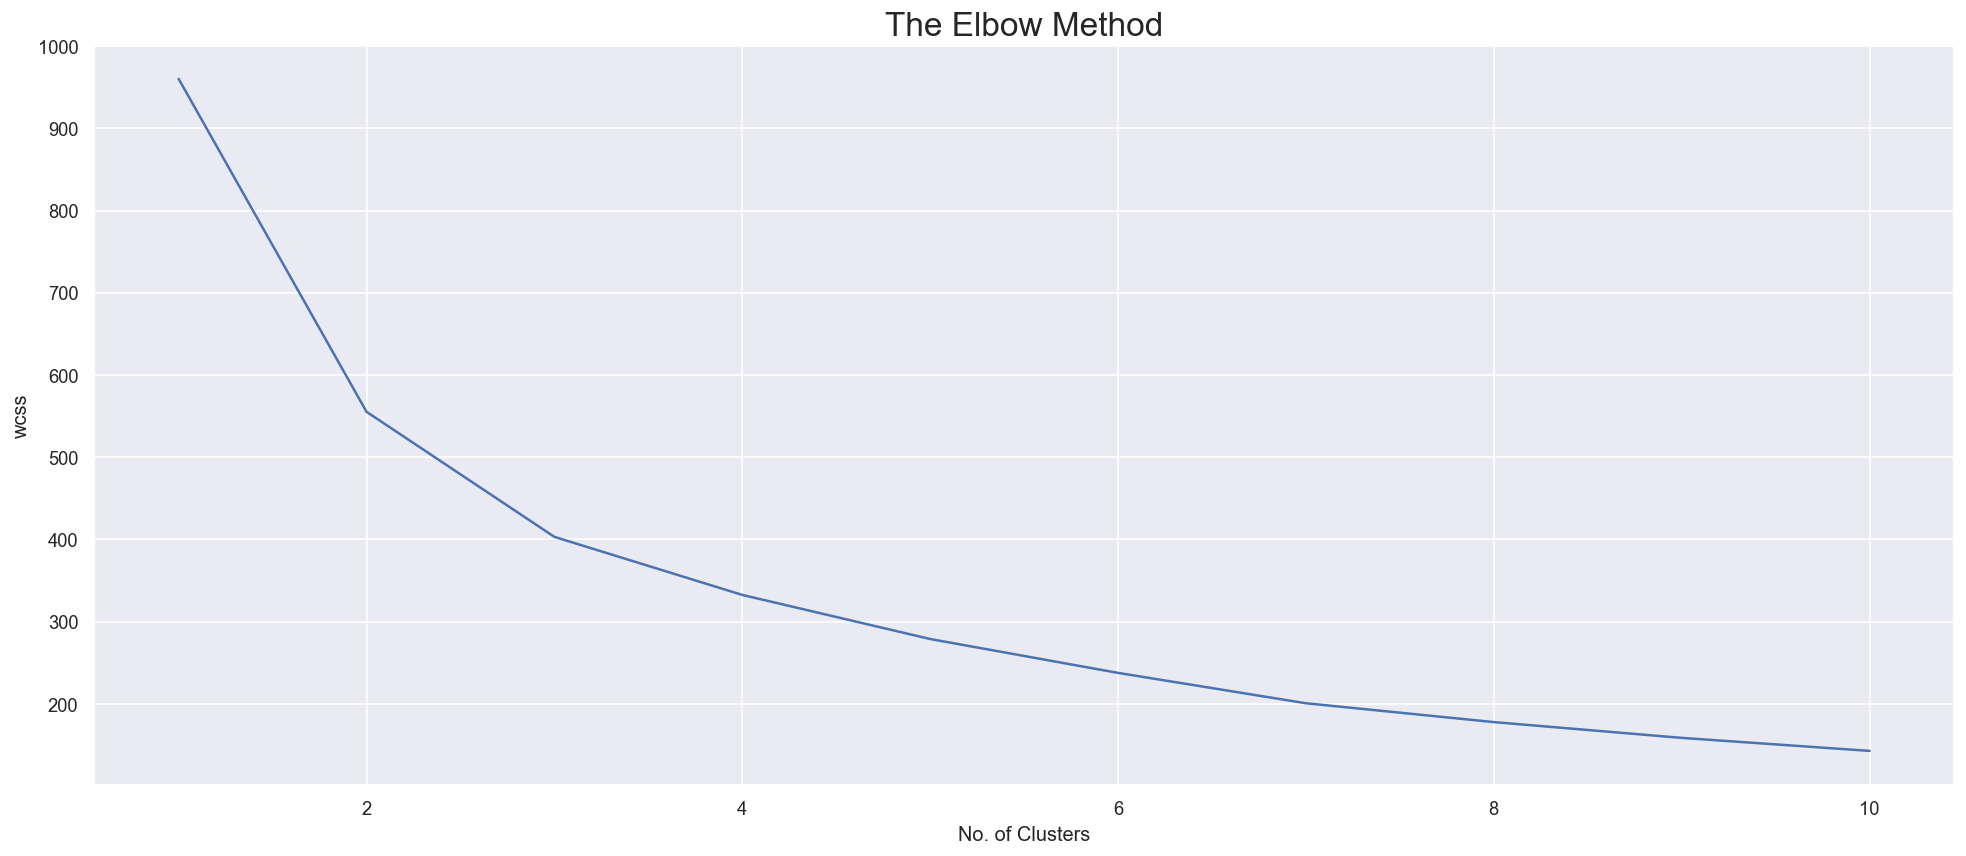

In [55]:
km = clustering.elbow_metod(KMeans, data_pca, random_seed=random_seed)

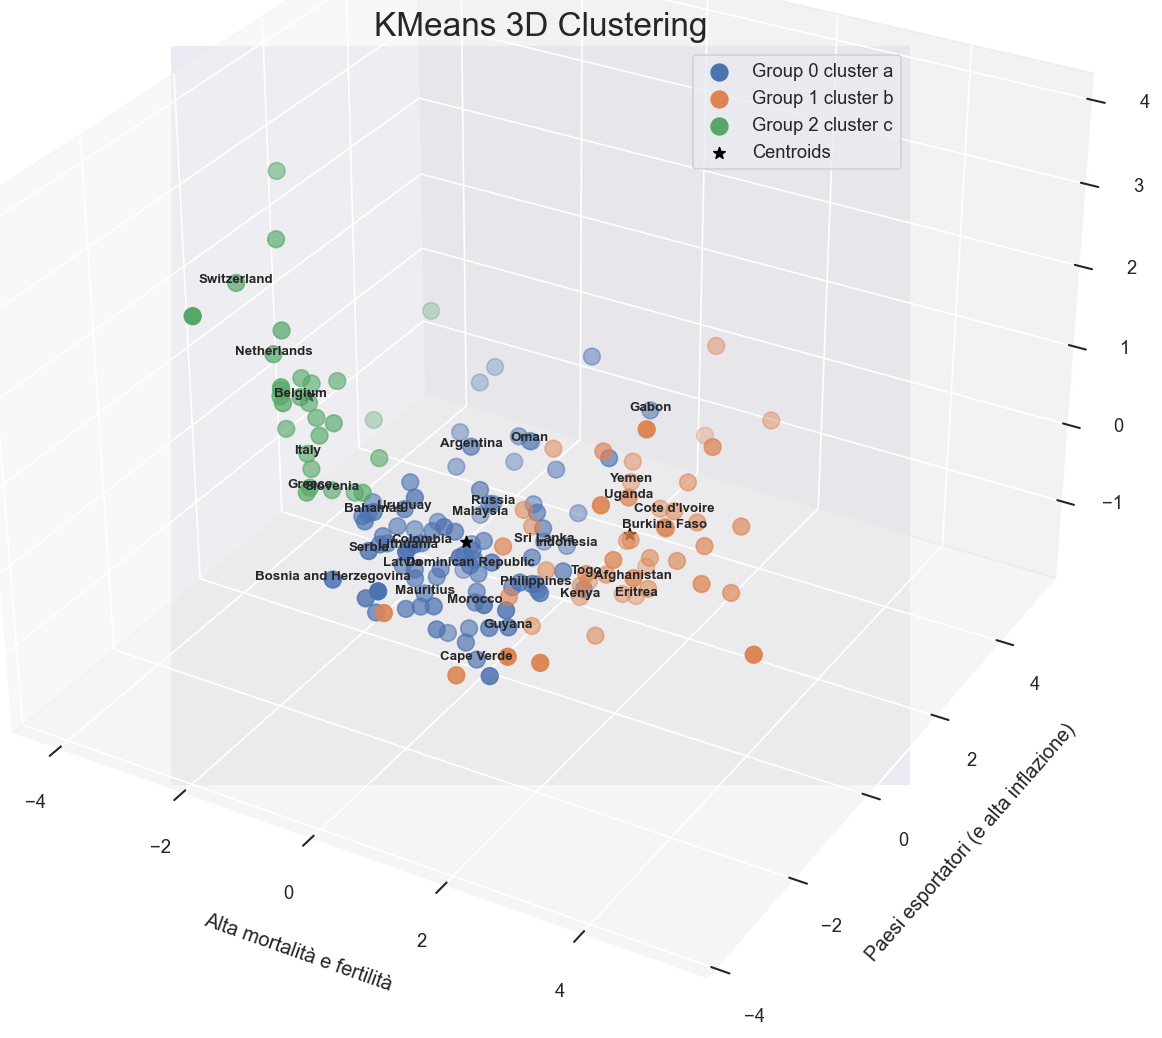

In [60]:
labels_3d = ['cluster a', 'cluster b', 'cluster c']
title_3d = 'KMeans 3D Clustering'
x='Alta mortalità e fertilità'
y='Paesi esportatori (e alta inflazione)'
z='Correlato positivamente con gdp'
y_means = clustering.pca_cluster_3d_visualizator(KMeans, data_pca, 3, labels_3d, x, y, z, title=title_3d, annotations=annotation, skip_rows=5, random_seed=random_seed)

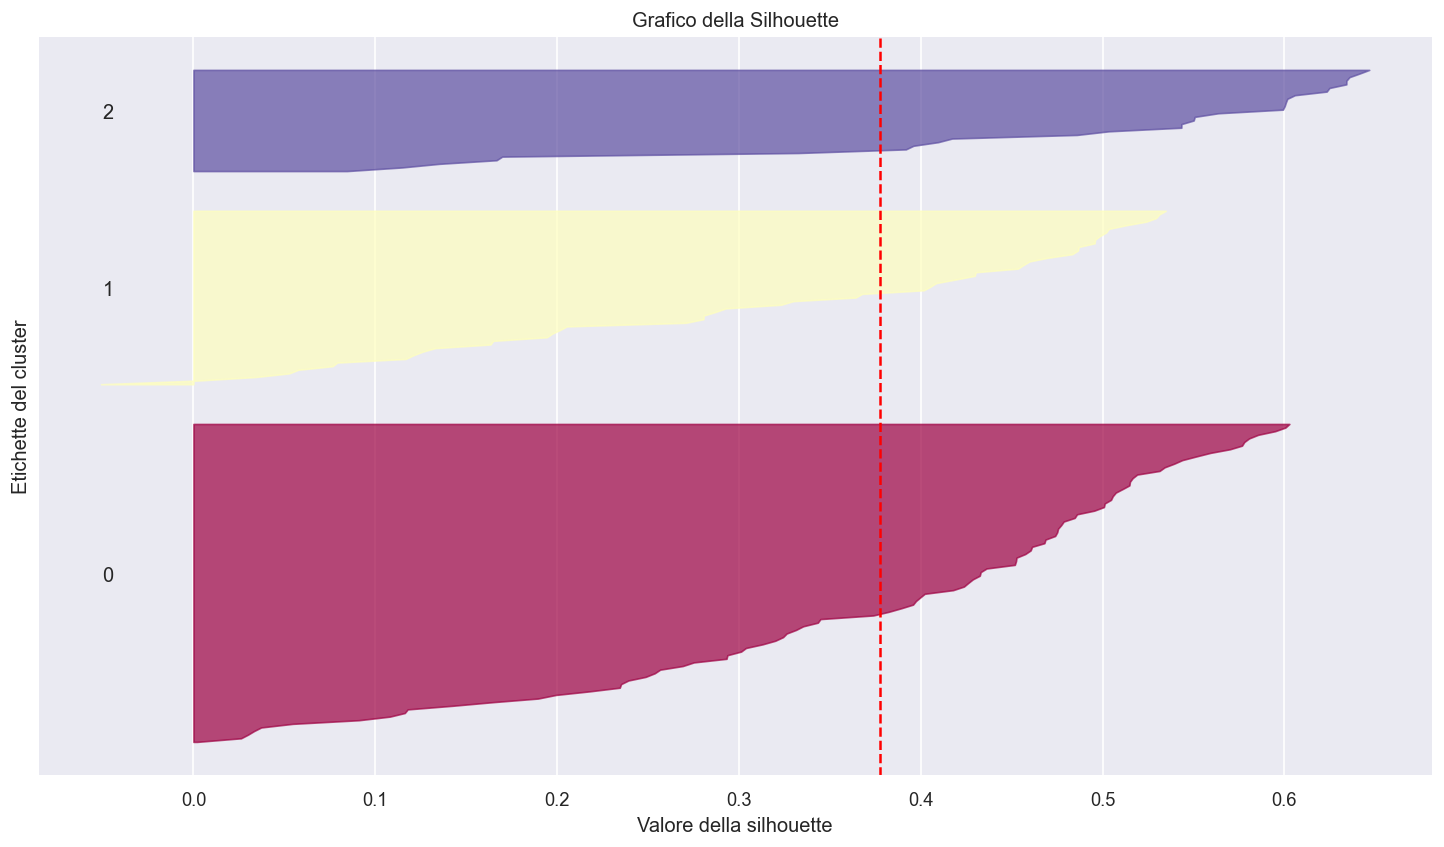

In [24]:
clustering.plot_silhouette(data_pca, y_means)

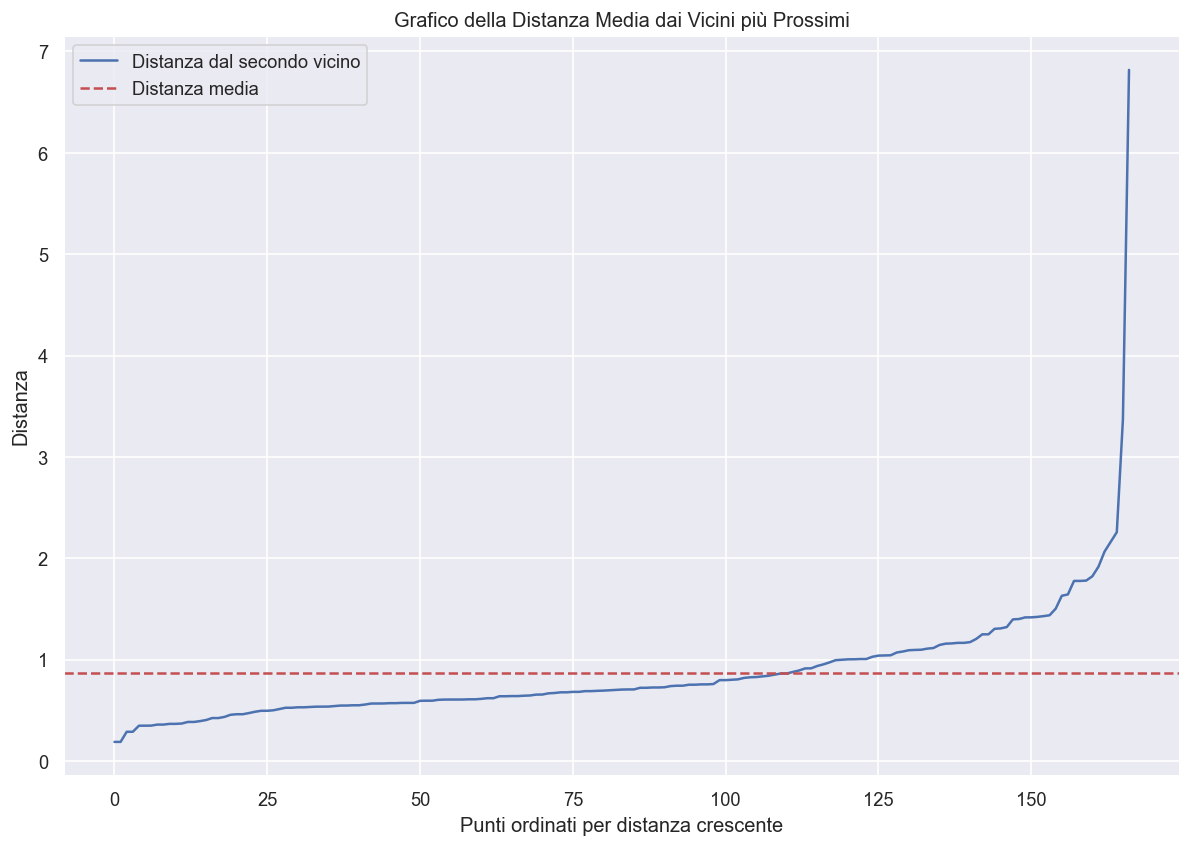

In [25]:
data_db = data[['gdpp', 'inflation', 'health', 'total_fer', 'net_balance', 'child_mort', 'life_expec']].copy()
clustering.plot_average_neighbor_distance(data_db)

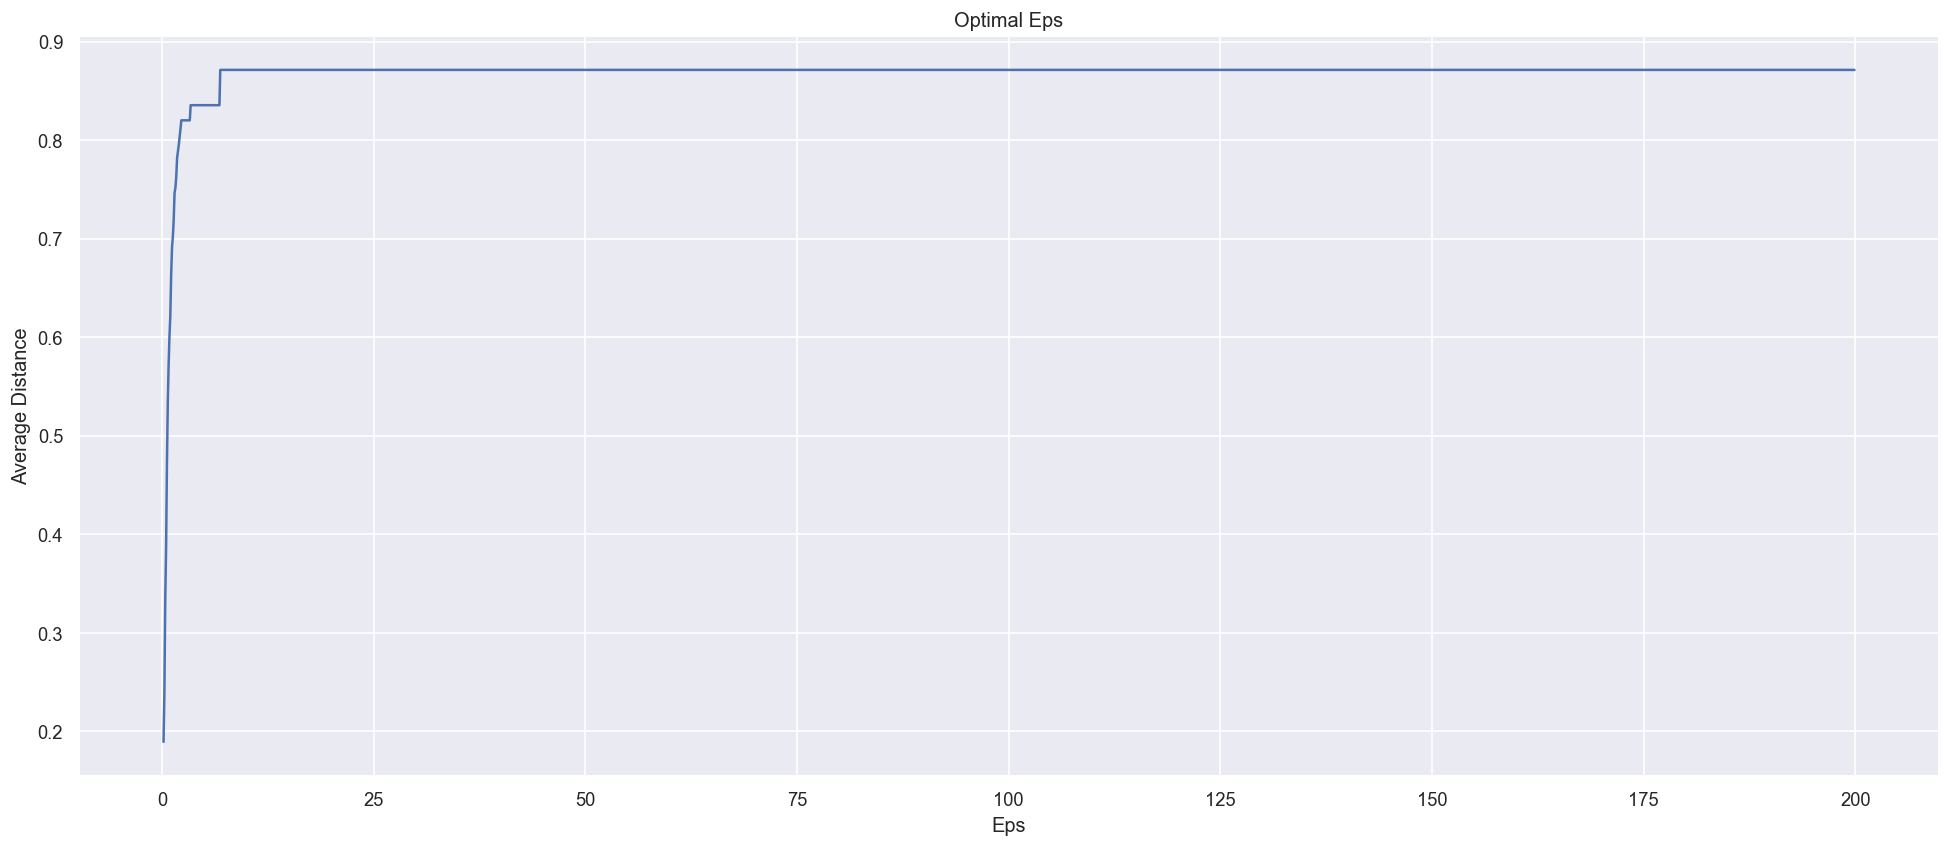

0.1


In [26]:
optimal_eps = clustering.find_optimal_eps(data_db, min_eps=0.1, max_eps=200, step=0.1)
print(optimal_eps)

In [66]:
data_clustering = data[['gdpp', 'inflation', 'health', 'total_fer', 'net_balance', 'child_mort', 'life_expec']].copy()
tsne = TSNE(n_components=2, random_state=random_seed)
data_tsne = tsne.fit_transform(data_clustering)

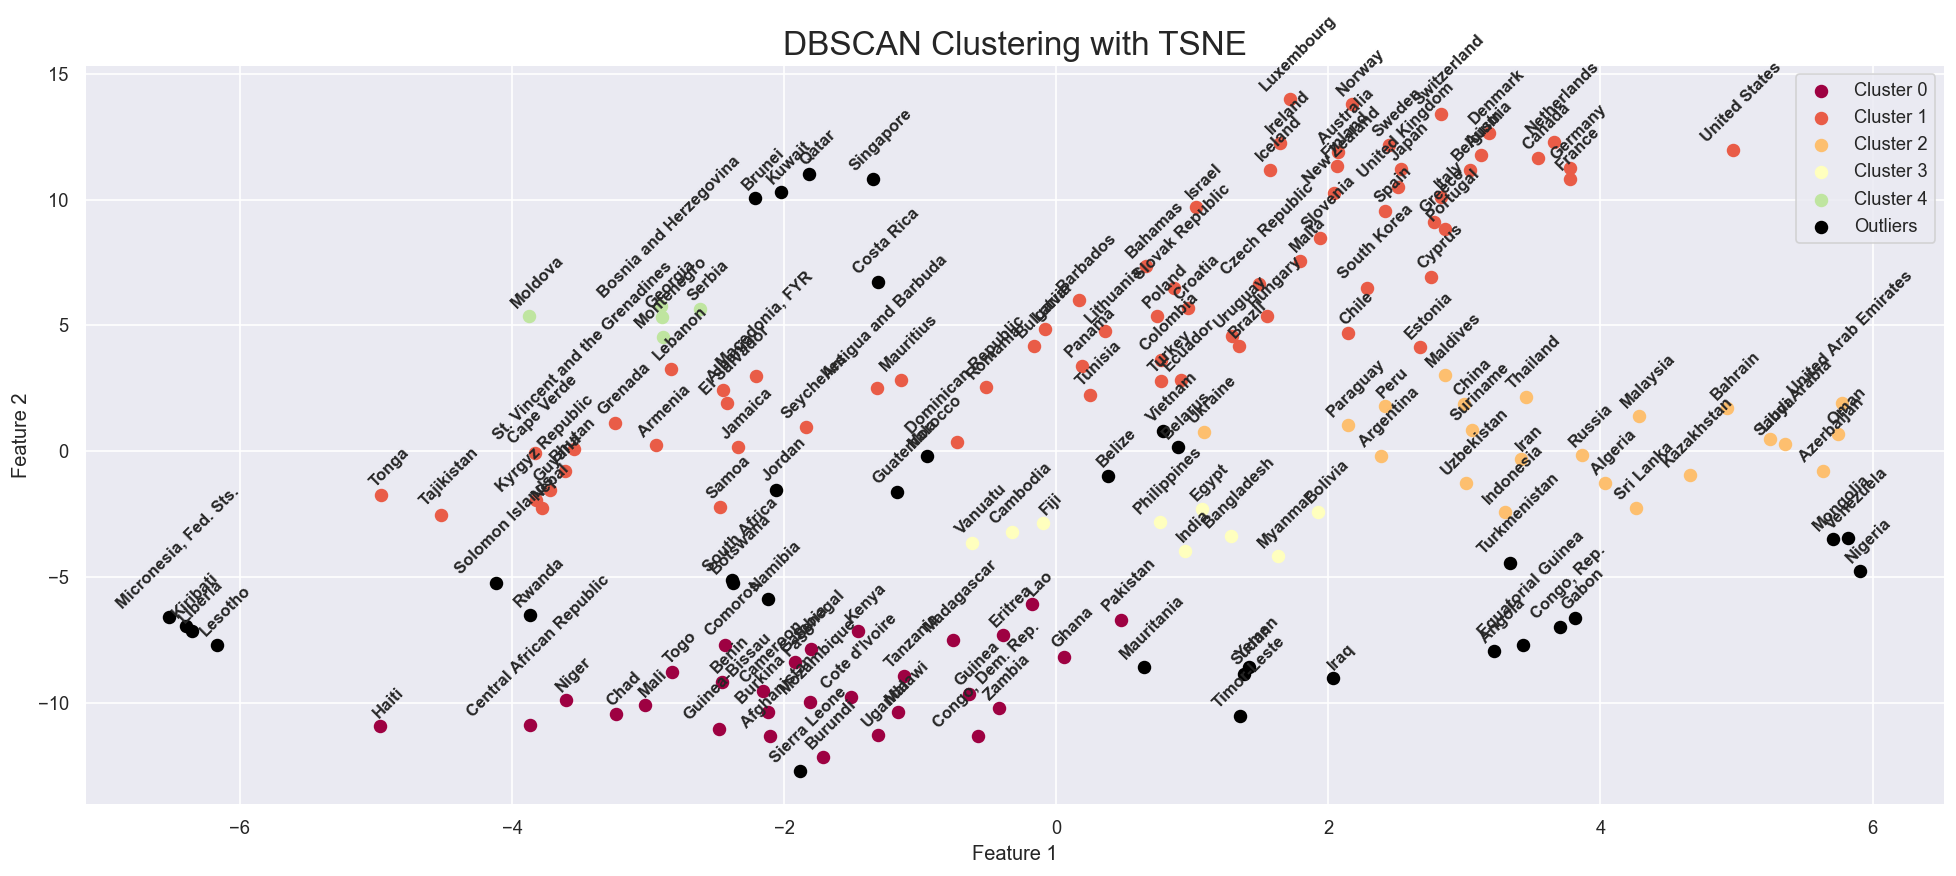

In [70]:
x='Feature 1'
y='Feature 2'
clustering.dbscan_cluster_visualizer(data_tsne, 1.35, x, y, min_samples=5, annotations=annotation, skip_rows=1, title='DBSCAN Clustering with TSNE')

In [29]:
data_clustering = data[['gdpp', 'inflation', 'health', 'total_fer', 'net_balance', 'child_mort', 'life_expec']].copy()
tsne = TSNE(n_components=2, random_state=random_seed)
data_tsne = tsne.fit_transform(data_clustering)

In [30]:
x='Feature 1'
y='Feature 2'
y_means = clustering.pca_cluster_visualizator(KMeans, data_tsne, 3, labels, x, y, annotations=annotation, skip_rows=5, title='Kmeans Clustering with TSNE')

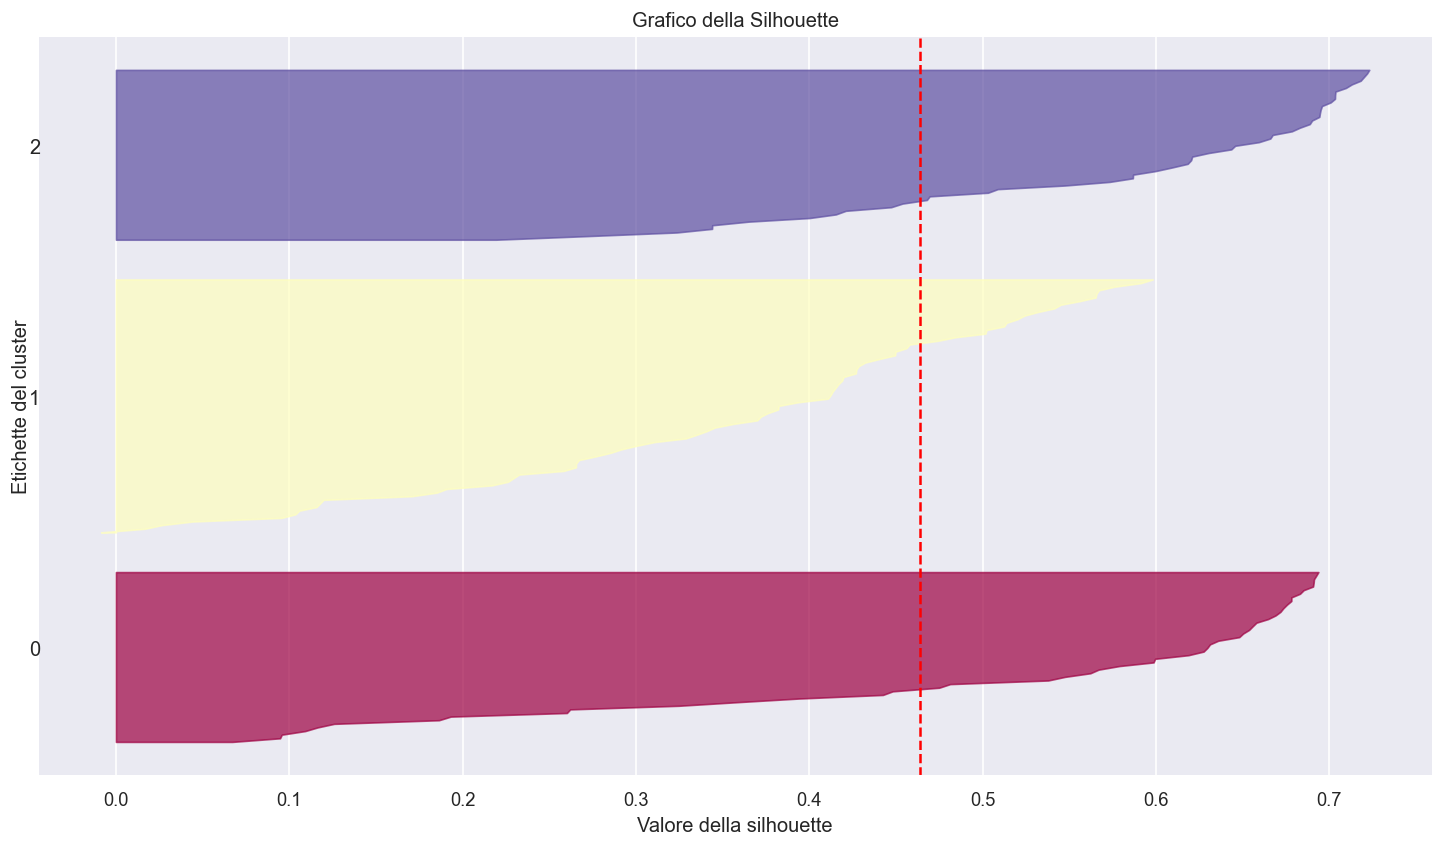

In [31]:
clustering.plot_silhouette(data_tsne, y_means)